classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Examples of classification problems include: Given an example, classify if it is spam or not. Given a handwritten character, classify it as one of the known characters

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


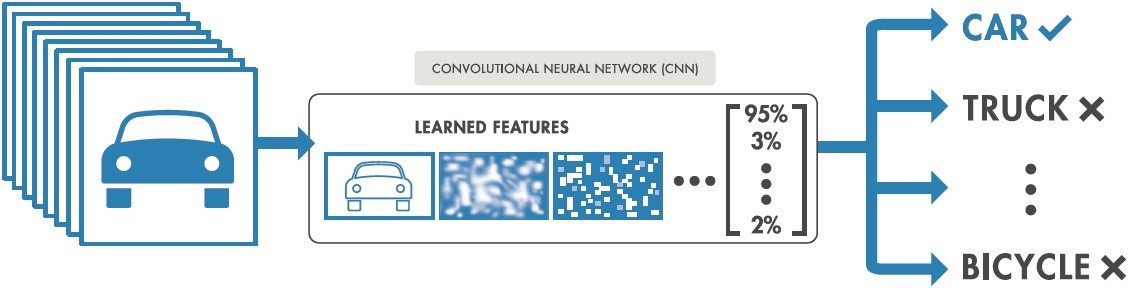

In [ ]:
## to ignore all the warning 

import warnings
warnings.filterwarnings('ignore')

# Step 1: Import the Data

In [ ]:
# the data set is present in the drive in the zip format. 
# we will be using linix cammand to import our data set 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In the next step we will unzip our data set using the linix command i.e "!unzip"

!unzip /content/drive/MyDrive/kagglecatsanddogs_5340.zip

unzip:  cannot find or open /content/drive/MyDrive/kagglecatsanddogs_5340.zip, /content/drive/MyDrive/kagglecatsanddogs_5340.zip.zip or /content/drive/MyDrive/kagglecatsanddogs_5340.zip.ZIP.


In [ ]:
# imports 

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from skimage.io import imread, imshow
import shutil

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPool2D


#Step 2: Data Visualization & Preprocessing

In [ ]:
# now we will visualise and see how many images are there in our data set 
# this is a important step for data pre preocessing as it is essential to ensure our data is balanced 

TRAIN_DIR = "/content/drive/MyDrive/PetImages" 

dict = {'cat':0 , 'dog': 0}

for dir in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, dir)
  dict[dir] = len(os.listdir(path))
  print(len(os.listdir(path)))

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Now lets visualise our classes 

sns.set_style('darkgrid')

x = ['cat', 'dog']
y = [dict['cat'] , dict['dog']]

sns.barplot(x,y)
plt.show()

In [ ]:
# lets creates a function that can show the images 
def desplay_images(img_dir):
  """
  * Input  : list of image directories
  * Output : prints out the images in the list 
  """
  i = 1
  plt.figure(figsize= (10,10))
  for img in img_dir:
    plt.subplot(1,3,i)
    plt.axis(False)
    imshow(img)
    i += 1
  plt.show()


In [ ]:
# this for loop will call the function display images. 
# we will be plotting three images from each classes

for dir in os.listdir(TRAIN_DIR):
  ipath = os.path.join(TRAIN_DIR, dir)
  count = 0
  img_dirs = []
  for i , img in enumerate( os.listdir(ipath) ):
    img_path = os.path.join(ipath, img)
    img_dirs.append(img_path)
    if i == 2:
      break
  desplay_images(img_dir = img_dirs)
  

## Split the images between train test and validation

# we have created the folder called data_dir  


*   Taining data will have 70 % of data
*   Validation and Test will have 15% of data



In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/PetImages"

dirs = ['train', 'val' , 'test']

ROOT_DIR = "./data_dir"

if not os.path.exists(ROOT_DIR):
  for d in dirs:
    os.makedirs( os.path.join(ROOT_DIR, d) )

for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"train",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.7) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = os.path.join(de,img)
    shutil.copyfile(org, dest )
    os.remove(org)
    
for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"val",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.6) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)


for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"test",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))), replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)
    

  



## Lets Now try to visualize how our data is distributed !

In [ ]:
ROOT_DIR = "/content/data_dir"

x = []
y = []
for folder in os.listdir(ROOT_DIR):
  dict = {'cat':0 , 'dog': 0}

  class_dir = os.path.join(ROOT_DIR, folder)
  
  for cls in os.listdir(class_dir):
    images = os.path.join(class_dir,cls)
    dict[cls] = len(os.listdir(images) )


    y.append(dict[cls])
    x.append(f"{folder}_{cls}")
  
  
  



In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
a = sns.barplot(x,y).set_title("Data Distribution")
plt.show()

# Using ImageDataGenerator function from keras to load and preprocess images 

In [ ]:
# we will now use keras module to pre-process our images 

traindatagen = ImageDataGenerator(
                                  rescale= 1./255,
                                  rotation_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip= True,
                                  )

train_data = traindatagen.flow_from_directory(directory= "/content/data_dir/train", class_mode='binary',
                                         target_size=(224,224) ) 

In [ ]:
# what number representss the class 
train_data.class_indices

In [ ]:
# reversing our dictionary for future use 

CLASS_IDX ={ j: i for i,j in train_data.class_indices.items() }
CLASS_IDX

In [ ]:
valdatagen = ImageDataGenerator( rescale= 1./255 )

val_data = valdatagen.flow_from_directory(directory= "/content/data_dir/val", class_mode='binary',
                                         target_size=(224,224) ) 

In [ ]:
testdatagen = ImageDataGenerator( rescale= 1./255 )

test_data = testdatagen.flow_from_directory(directory= "/content/data_dir/test", class_mode='binary',
                                         target_size=(224,224) ) 

# Step 3: Build Model

In [ ]:
model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'] )
 
model.summary()

In [ ]:
model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )

In [ ]:

## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(generator=train_data , 
                           validation_data= val_data, 
                           validation_steps= 16,
                           steps_per_epoch= 32 , 
                           epochs= 30, 
                           verbose= 1, 
                           callbacks = call_back )

In [ ]:

# Loading the best fit model 
from keras.models import load_model

model = load_model("/content/best_model.h5")

# Step 4: Model Validation 

In [ ]:
h =  hist.history
h.keys()

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="yellow")
plt.title("val_accuracy vs accuracy")
plt.show()

In [ ]:
plt.plot(h['loss'], c = 'red')
plt.plot(h['val_loss'] ,c="green")
plt.title("val_loss vs training_loss")
plt.show()

In [ ]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test_data )[1] 

print(f"The accuracy of your model is = {acc*100} %")

## Lets test our model by passing a unique value. 
## Every time we run the below block of code a unique image is fetch and the model gives a predictions 

In [ ]:
TEST_DIR = "/content/Cat Dog Data Set/test"
img = np.random.choice(os.listdir(TEST_DIR), 1 )[0]
image = img_to_array(load_img( os.path.join( TEST_DIR, img), target_size=(224,224) ))/255

plt.imshow(image)
plt.title("Input Image")
plt.axis(False)
plt.show()

print("########################################################################################")

print( f"{image.shape} is the dimention of image before expansion ")
#expanding the dimension so that it can be fit inside the model
image = np.expand_dims( image, axis= 0) 
print()
print( f"{image.shape} is the dimention of image after expansion ")

print("########################################################################################")

# Now lets see what our model predicts for our image 

pred = model.predict_classes(image)
print( f" The model predicts the image is a {CLASS_IDX[pred[0][0] ]} ")